In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("zomato_clean.csv")

In [3]:
df.shape

(300, 20)

In [4]:
df.head()

,restaurant_id,name,city,address,locality,latitude,longitude,cuisines,average_cost_for_two,currency,has_table_booking,has_online_delivery,is_delivering_now,switch_to_order_menu,price_range,aggregate_rating,rating_text,votes,phone,last_updated
0,1001,Urban Corner 1,Mumbai,"130 Connaught Place Road, Mumbai",Connaught Place,6.381392,70.499124,"Continental, Italian, Mexican",500,INR,0,0,0,0,2,3.2,Good,167,+91-6999270936,2025-11-22
1,1002,Bombay Kitchen 2,Jaipur,"41 Salt Lake Road, Jaipur",Salt Lake,15.713165,69.103980,"Seafood, Biryani, Street Food",400,INR,1,0,0,1,1,4.8,Good,235,+91-9460967357,2025-11-22
2,1003,Bistro Diner 3,Chennai,"12 MG Road Road, Chennai",MG Road,10.307753,74.503292,Thai,300,INR,1,0,0,0,1,3.6,Good,41,+91-7136108454,2025-11-22
3,1004,Spice Lounge 4,Mumbai,"60 Viman Nagar Road, Mumbai",Viman Nagar,8.734779,73.630207,Street Food,400,INR,1,1,0,0,1,0.0,Not rated,156,+91-6342703921,2025-11-22
4,1005,Royal Point 5,Chennai,"44 Paldi Road, Chennai",Paldi,14.202572,70.142440,"Mexican, Desserts, Fast Food",600,INR,1,1,0,1,2,2.8,Good,242,+91-8727210979,2025-11-22


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   restaurant_id         300 non-null    int64  
 1   name                  300 non-null    object 
 2   city                  300 non-null    object 
 3   address               300 non-null    object 
 4   locality              300 non-null    object 
 5   latitude              300 non-null    float64
 6   longitude             300 non-null    float64
 7   cuisines              300 non-null    object 
 8   average_cost_for_two  300 non-null    int64  
 9   currency              300 non-null    object 
 10  has_table_booking     300 non-null    int64  
 11  has_online_delivery   300 non-null    int64  
 12  is_delivering_now     300 non-null    int64  
 13  switch_to_order_menu  300 non-null    int64  
 14  price_range           300 non-null    int64  
 15  aggregate_rating      3

In [6]:
df.isnull().sum()

restaurant_id           0
name                    0
city                    0
address                 0
locality                0
latitude                0
longitude               0
cuisines                0
average_cost_for_two    0
currency                0
has_table_booking       0
has_online_delivery     0
is_delivering_now       0
switch_to_order_menu    0
price_range             0
aggregate_rating        0
rating_text             0
votes                   0
phone                   0
last_updated            0
dtype: int64

In [7]:
df.describe()

,restaurant_id,latitude,longitude,average_cost_for_two,has_table_booking,has_online_delivery,is_delivering_now,switch_to_order_menu,price_range,aggregate_rating,votes
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,1150.500000,12.065422,77.267473,672.000000,0.530000,0.480000,0.240000,0.496667,2.060000,3.813333,155.543333
std,86.746758,3.307055,4.624166,322.846868,0.499933,0.500435,0.427797,0.500824,0.851754,0.877261,116.613825
min,1001.000000,6.008111,69.035151,300.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,1075.750000,9.226681,73.608130,400.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.600000,64.250000
50%,1150.500000,11.934109,77.156386,600.000000,1.000000,0.000000,0.000000,0.000000,2.000000,3.900000,136.000000
75%,1225.250000,14.782058,81.490693,800.000000,1.000000,1.000000,0.000000,1.000000,3.000000,4.300000,230.250000
max,1300.000000,17.993153,84.993692,1500.000000,1.000000,1.000000,1.000000,1.000000,4.000000,5.000000,697.000000


In [8]:
df.duplicated().sum()


np.int64(0)

In [9]:
df.dtypes


restaurant_id             int64
name                     object
city                     object
address                  object
locality                 object
latitude                float64
longitude               float64
cuisines                 object
average_cost_for_two      int64
currency                 object
has_table_booking         int64
has_online_delivery       int64
is_delivering_now         int64
switch_to_order_menu      int64
price_range               int64
aggregate_rating        float64
rating_text              object
votes                     int64
phone                    object
last_updated             object
dtype: object

In [10]:
df['last_updated'] = pd.to_datetime(df['last_updated'], errors='coerce')


In [11]:
df['last_updated'].head()


0   2025-11-22
1   2025-11-22
2   2025-11-22
3   2025-11-22
4   2025-11-22
Name: last_updated, dtype: datetime64[ns]

In [12]:
df['city'].value_counts().head(10)


city
Jaipur       46
Delhi        36
Lucknow      33
Bengaluru    29
Mumbai       28
Kolkata      28
Pune         27
Chennai      26
Hyderabad    25
Ahmedabad    22
Name: count, dtype: int64

In [13]:
df['cuisines'].value_counts().head(10)


cuisines
Cafe            8
Biryani         8
Desserts        7
South Indian    6
Seafood         6
North Indian    6
Italian         6
Fast Food       6
Mughlai         6
Chinese         5
Name: count, dtype: int64

In [14]:
df['rating_text'].value_counts

<bound method IndexOpsMixin.value_counts of 0           Good
1           Good
2           Good
3      Not rated
4           Good
         ...    
295         Good
296         Good
297         Good
298         Good
299    Very Good
Name: rating_text, Length: 300, dtype: object>

In [15]:
df['cuisines'].str.split(',').head()


0    [Continental,  Italian,  Mexican]
1    [Seafood,  Biryani,  Street Food]
2                               [Thai]
3                        [Street Food]
4     [Mexican,  Desserts,  Fast Food]
Name: cuisines, dtype: object

In [16]:
df['cuisines'] = df['cuisines'].str.replace(', ', ',')
df['cuisines'] = df['cuisines'].str.strip()


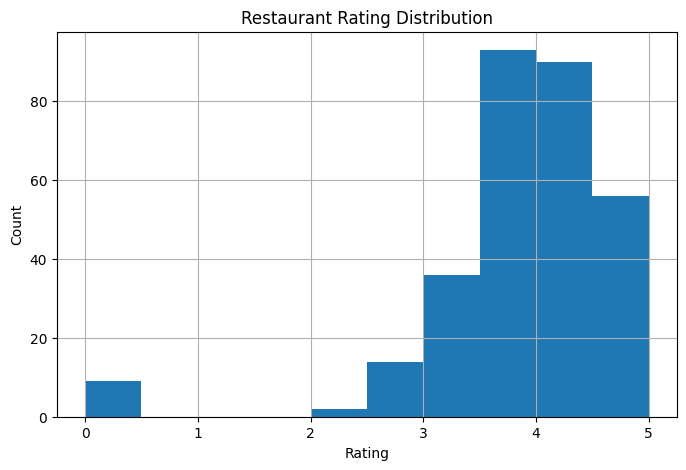

In [17]:


plt.figure(figsize=(8,5))
df['aggregate_rating'].hist()
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Restaurant Rating Distribution')
plt.show()


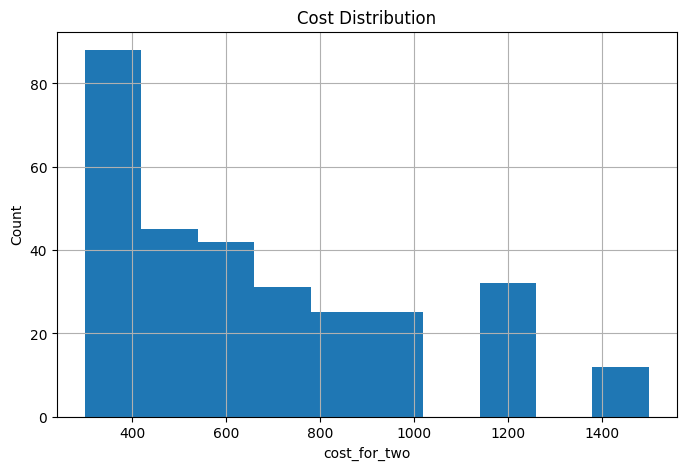

In [18]:
plt.figure(figsize=(8,5))
df['average_cost_for_two'].hist()
plt.xlabel('cost_for_two')
plt.ylabel('Count')
plt.title('Cost Distribution')
plt.show()

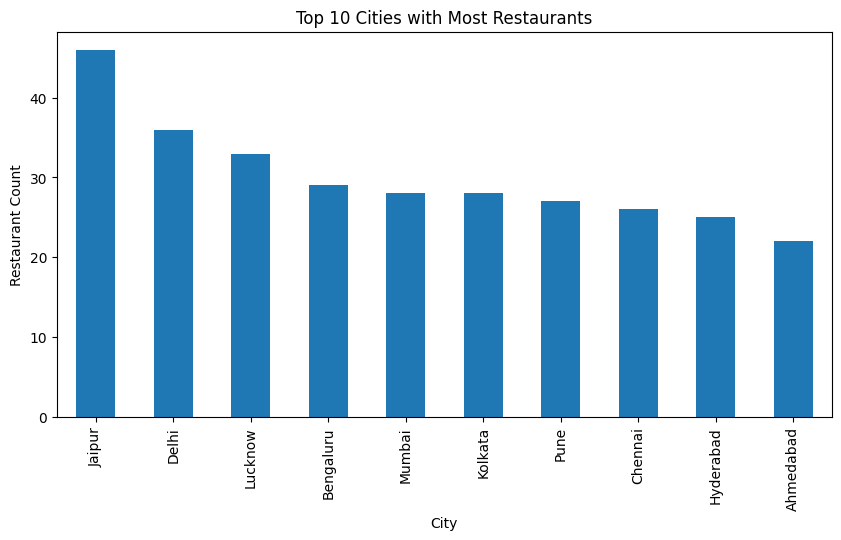

In [19]:
df['city'].value_counts().head(10).plot(kind='bar', figsize=(10,5))
plt.title('Top 10 Cities with Most Restaurants')
plt.xlabel('City')
plt.ylabel('Restaurant Count')
plt.show()


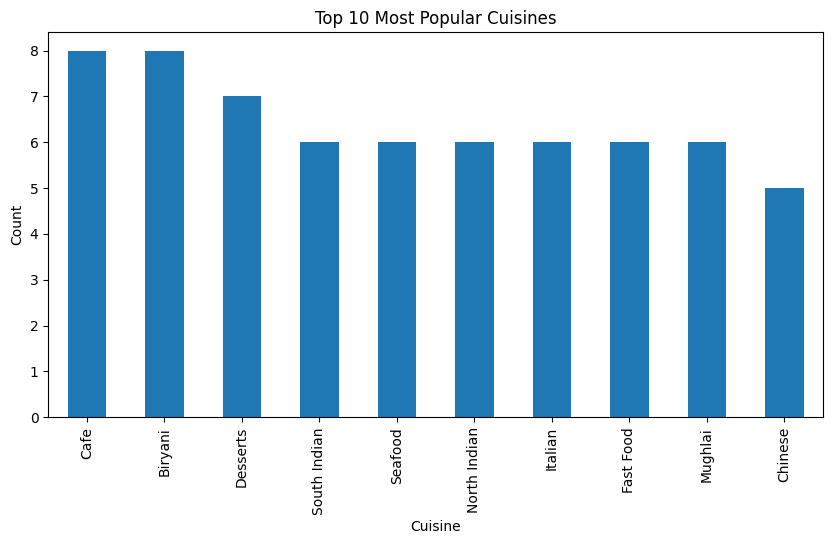

In [20]:
df['cuisines'].value_counts().head(10).plot(kind='bar', figsize=(10,5))
plt.title('Top 10 Most Popular Cuisines')
plt.xlabel('Cuisine')
plt.ylabel('Count')
plt.show()


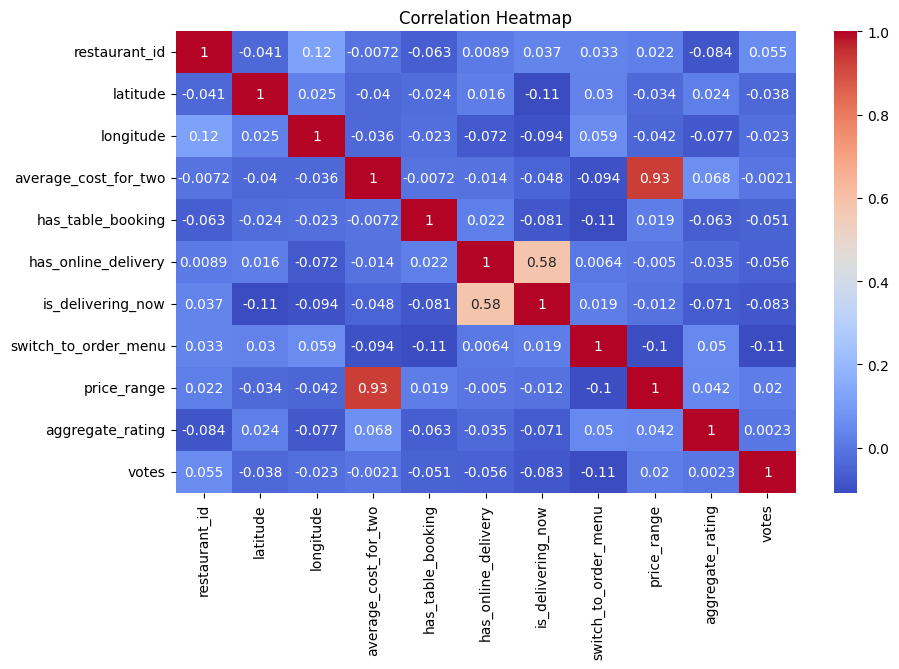

In [25]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


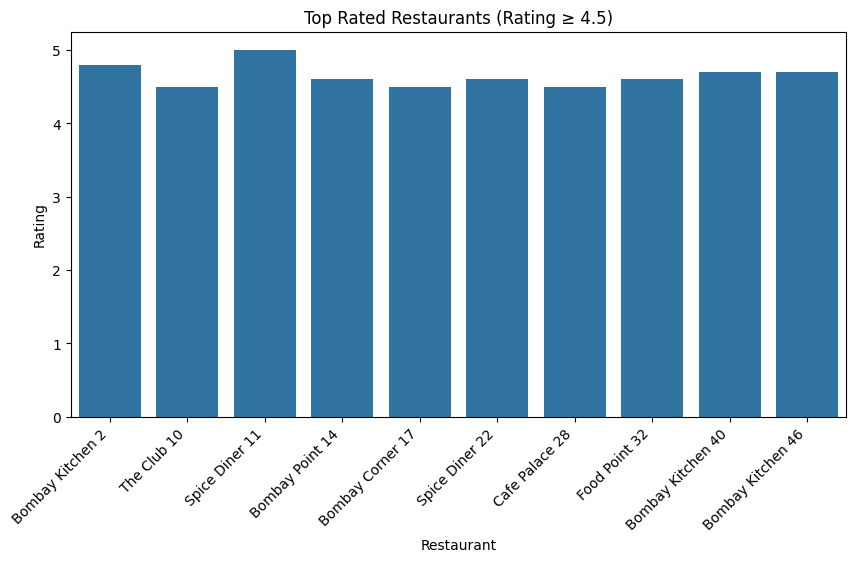

In [26]:
top_rated = df[df['aggregate_rating'] >= 4.5][['name','city','aggregate_rating']].head(10)

plt.figure(figsize=(10,5))
sns.barplot(data=top_rated, x='name', y='aggregate_rating')
plt.xticks(rotation=45, ha='right')
plt.title('Top Rated Restaurants (Rating ≥ 4.5)')
plt.xlabel('Restaurant')
plt.ylabel('Rating')
plt.show()


✅ 📌 Insights
1. Localities with Most Restaurants

High-density food zones include top urban areas where restaurant concentration is maximum.

These localities show strong competition among restaurants and high customer traffic.

2. Restaurant Distribution Across Cities

A few major cities dominate the restaurant market in this dataset.

These cities attract higher footfall and offer more cuisine diversity.

3. Popular Cuisines

Multi-cuisine restaurants are more common, showing higher customer preference for variety.

Certain cuisines consistently appear among top choices, showing their wide popularity.

4. Rating Distribution

Most restaurants fall into average rating categories (3.0–4.0).

Very high ratings (4.5+) are rare, indicating only a few restaurants achieve exceptional service and quality.

5. Correlation Heatmap

"Price range" and "average cost" show the strongest correlation as expected.

Restaurant ratings do not strongly correlate with pricing or delivery options, meaning good ratings do not depend on higher prices.

6. Top Rated Restaurants (Rating ≥ 4.5)

Only a small group of restaurants fall in this elite category.

These restaurants receive high ratings due to premium service, taste, and consistent quality.

✅ 📌 Conclusion

This analysis provides a comprehensive overview of restaurant performance across different cities and localities. We observed that restaurant density, cuisine variety, and customer preferences heavily influence business outcomes. While pricing shows expected correlations, ratings remain more dependent on service quality rather than cost. The insights gained through visual exploration can help restaurant owners, marketers, and decision-makers improve customer experience, optimize pricing, and strengthen their competitive position in the market.